# step 5 conclusion

In [31]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [32]:
def split_to_train_and_test(dataset, label_column, test_ratio, rand_state):
    TRAINING_FEATURES = dataset.columns[dataset.columns != label_column]
    TARGET_FEATURE = label_column
    X=dataset[TRAINING_FEATURES]
    y= dataset[TARGET_FEATURE]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test

In [40]:
dataset=pd.read_csv("finale_normalized_df.csv")

X_train, X_test, y_train, y_test = split_to_train_and_test(dataset, 'ratings', 0.3, 42)

clf= RandomForestClassifier(n_estimators=130, max_depth=15,min_samples_split=15,random_state=2 )

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=130,
                       random_state=2)

In [49]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
    
print("accuracy on train data",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train))
print("accuracy on test data",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))

print("f1_score Score for test: ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='weighted'))

print("f1_score Score for train: ",f1_score(y_train, y_pred_train, 
                                           pos_label='positive',
                                           average='weighted'))

accuracy on train data 0.8415273271774395
accuracy on test data 0.8125181950509461
f1_score Score for test:  0.7665630693656948
f1_score Score for train:  0.8049027252610503


C:\Users\linoy\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\linoy\Downloads\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


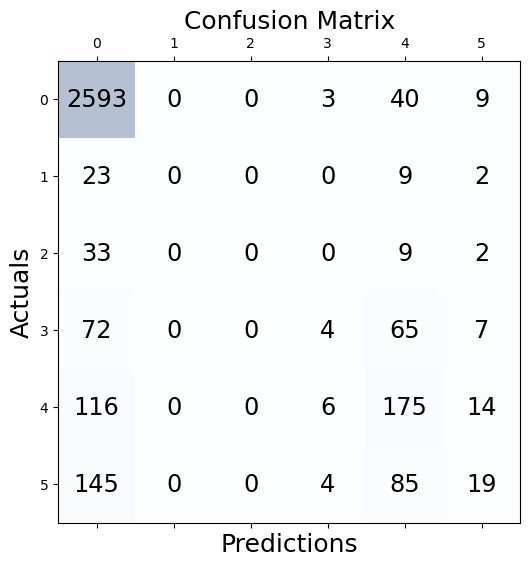

In [48]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# conclusion
    1.רמת הדיוק של המודל הטוב ביותר הינה 81% המראה על כך שאכן ניתן ל"חזות" במידה מסוימת את הצלחת פריט ביגוד מסוים
    2.רוב הפריטים מדורגים 0 כוכבים, אשר מראה כי קשה לקבל דירוג\חוות דעת מהמשתמשים או שפשוט תחלופת הפריטים גבוהה מאוד באתרים אלו מה שמונע הצטברות של מוצרים מדורגים. 
    3. רק 23.3% מהפריטים מדורגים
    4. ראינו שככל שמחיר הפריט יקר יותר הסיכוי שלו להיות מדורג קטן
    5. ניתן לראות שדירוג במידות הגדולות משמעותי יותר משאר המידות
    6.קטגוריית הפיגמות ובגדי ההריון כמעט ואינם מדורגות 0 בהשוואה לשאר הקטגוריות המתפלגות יחסית שווה בין כל הדירוגים
    7.בגדים העשויים מהבדים: קוטנה, אלסטיין, ויזקוזה ופוליאסטר מדורגים משמעותית גבוהה יותר משאר תרכובות הבד
    8.צבע הפריט חסר השפעה על דירוגו
    
    
שיפורים למחקר:

    1. על ידי לקיחת אתרים נוספים והעלת כמות הפריטים לביסוס המודל
    
    2.בנוסף ההינו רוצות להוסיף את פרמטר העלה לאתרת כלומר לבדוק כמה זמן הפריט נמצא באתר דבר אשר אנחנו מאמינות היה יכול לשפר משמעותית את אמינות ודיוק המודל בשל תחלופת הבגדים הגבוהה המשפיעה על דירוג הפריט.